In [ ]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-9mykw1y0
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-9mykw1y0
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using c

In [ ]:
!pip install matplotlib-venn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving set-of-random-objects.jpg to set-of-random-objects.jpg


Step 1: Image Segmentation

Segment all objects within the input image using a pre-trained model.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:03<00:00, 46.5MB/s]


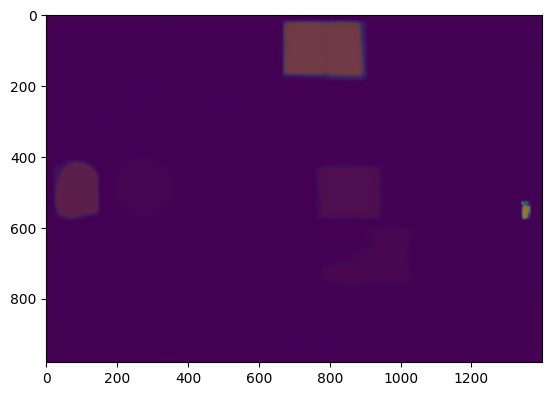

In [ ]:
import torch
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# Load the pre-trained Mask R-CNN model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor()
    ])
    return transform(image).unsqueeze(0)

def segment_image(image_path):
    image = load_image(image_path)
    with torch.no_grad():
        prediction = model(image)
    return prediction

image_path = "set-of-random-objects.jpg"
segmented_output = segment_image(image_path)

# Visualize segmented objects
image = Image.open(image_path).convert("RGB")
plt.imshow(image)
for mask in segmented_output[0]['masks']:
    mask = mask.squeeze().cpu().numpy()
    plt.imshow(mask, alpha=0.5)
plt.show()


Object Extraction and Storage

Extract each segmented object from the image and store them with unique IDs.

In [ ]:
output_dir = "segmented_objects"
os.makedirs(output_dir, exist_ok=True)

def extract_objects(image_path, prediction):
    image = Image.open(image_path).convert("RGB")
    image_np = np.array(image)

    for idx, mask in enumerate(prediction[0]['masks']):
        mask = mask.squeeze().cpu().numpy()

        # Ensure mask is binary
        mask = (mask > 0.5).astype(np.uint8)

        # Apply mask to the image
        segmented_image = cv2.bitwise_and(image_np, image_np, mask=mask * 255)

        # Convert segmented image to PIL format and save
        object_image = Image.fromarray(segmented_image)

        object_id = f"object_{idx+1}"
        object_image.save(os.path.join(output_dir, f"{object_id}.png"))
        print(f"Saved: {object_id}")

extract_objects(image_path, segmented_output)


Saved: object_1
Saved: object_2
Saved: object_3
Saved: object_4
Saved: object_5
Saved: object_6
Saved: object_7
Saved: object_8
Saved: object_9
Saved: object_10
Saved: object_11
Saved: object_12
Saved: object_13
Saved: object_14
Saved: object_15
Saved: object_16
Saved: object_17
Saved: object_18
Saved: object_19
Saved: object_20
Saved: object_21
Saved: object_22
Saved: object_23
Saved: object_24


Object Identification

Identify and describe each object using the CLIP model.

In [ ]:
from transformers import CLIPProcessor, CLIPModel
import torch

# Load pre-trained CLIP model
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def identify_objects(image_dir):
    descriptions = {}
    for filename in os.listdir(image_dir):
        if filename.endswith(".png"):
            image_path = os.path.join(image_dir, filename)
            image = Image.open(image_path).convert("RGB")
            inputs = clip_processor(images=image, return_tensors="pt")

            # Generate descriptions using the CLIP model
            with torch.no_grad():
                outputs = clip_model.get_image_features(**inputs)

            # Placeholder for description (you might want to replace this with actual CLIP inference logic)
            description = f"Object in {filename}"
            descriptions[filename] = description

    return descriptions

# Identify objects
object_descriptions = identify_objects(output_dir)
print(object_descriptions)

#This function processes each extracted object image using the CLIP model to generate a description. Currently, it uses a placeholder description for simplicity.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

{'object_14.png': 'Object in object_14.png', 'object_3.png': 'Object in object_3.png', 'object_20.png': 'Object in object_20.png', 'object_10.png': 'Object in object_10.png', 'object_6.png': 'Object in object_6.png', 'object_19.png': 'Object in object_19.png', 'object_21.png': 'Object in object_21.png', 'object_12.png': 'Object in object_12.png', 'object_17.png': 'Object in object_17.png', 'object_5.png': 'Object in object_5.png', 'object_9.png': 'Object in object_9.png', 'object_11.png': 'Object in object_11.png', 'object_1.png': 'Object in object_1.png', 'object_22.png': 'Object in object_22.png', 'object_8.png': 'Object in object_8.png', 'object_13.png': 'Object in object_13.png', 'object_18.png': 'Object in object_18.png', 'object_4.png': 'Object in object_4.png', 'object_15.png': 'Object in object_15.png', 'object_16.png': 'Object in object_16.png', 'object_7.png': 'Object in object_7.png', 'object_23.png': 'Object in object_23.png', 'object_2.png': 'Object in object_2.png', 'obje

In [ ]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (7,856 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123598 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
!pip install pytesseract

Text/Data Extraction from Objects

Extract text from each object image using OCR.

In [ ]:
import pytesseract

def extract_text(image_path):
    image = Image.open(image_path).convert("RGB")
    text = pytesseract.image_to_string(image)
    return text

# Extract text from each object image
extracted_texts = {}
for filename in os.listdir(output_dir):
    if filename.endswith(".png"):
        image_path = os.path.join(output_dir, filename)
        text = extract_text(image_path)
        extracted_texts[filename] = text

print(extracted_texts)

#This function uses pytesseract to extract text from each object image and stores the results.

{'object_14.png': '\x0c', 'object_3.png': ' \n\x0c', 'object_20.png': ' \n\x0c', 'object_10.png': '\x0c', 'object_6.png': '\x0c', 'object_19.png': '\x0c', 'object_21.png': '\x0c', 'object_12.png': '\x0c', 'object_17.png': '\x0c', 'object_5.png': '\x0c', 'object_9.png': '\x0c', 'object_11.png': ' \n\x0c', 'object_1.png': '\x0c', 'object_22.png': '\x0c', 'object_8.png': '\x0c', 'object_13.png': '\x0c', 'object_18.png': '\x0c', 'object_4.png': '\x0c', 'object_15.png': '\x0c', 'object_16.png': '\x0c', 'object_7.png': '=\n\x0c', 'object_23.png': '\x0c', 'object_2.png': '\x0c', 'object_24.png': '\x0c'}


Summarize Object Attributes

Summarize the nature and attributes of each object

In [ ]:
def summarize_attributes(descriptions, texts):
    summaries = {}
    for obj_id in descriptions:
        description = descriptions[obj_id]
        text = texts[obj_id]
        summary = f"Description: {description}, Extracted Text: {text}"
        summaries[obj_id] = summary

    return summaries

# Summarize attributes
object_summaries = summarize_attributes(object_descriptions, extracted_texts)
print(object_summaries)

#This function combines descriptions and extracted text to create a summary for each object.

{'object_14.png': 'Description: Object in object_14.png, Extracted Text: \x0c', 'object_3.png': 'Description: Object in object_3.png, Extracted Text:  \n\x0c', 'object_20.png': 'Description: Object in object_20.png, Extracted Text:  \n\x0c', 'object_10.png': 'Description: Object in object_10.png, Extracted Text: \x0c', 'object_6.png': 'Description: Object in object_6.png, Extracted Text: \x0c', 'object_19.png': 'Description: Object in object_19.png, Extracted Text: \x0c', 'object_21.png': 'Description: Object in object_21.png, Extracted Text: \x0c', 'object_12.png': 'Description: Object in object_12.png, Extracted Text: \x0c', 'object_17.png': 'Description: Object in object_17.png, Extracted Text: \x0c', 'object_5.png': 'Description: Object in object_5.png, Extracted Text: \x0c', 'object_9.png': 'Description: Object in object_9.png, Extracted Text: \x0c', 'object_11.png': 'Description: Object in object_11.png, Extracted Text:  \n\x0c', 'object_1.png': 'Description: Object in object_1.p

Data Mapping

Map all extracted data and attributes to each object and the master input image.

In [ ]:
import json

# Create a data structure to map data
data_mapping = {}
for obj_id in object_summaries:
    data_mapping[obj_id] = {
        "description": object_descriptions[obj_id],
        "extracted_text": extracted_texts[obj_id],
        "summary": object_summaries[obj_id]
    }

# Save the mapping to a JSON file
mapping_file = "data_mapping.json"
with open(mapping_file, "w") as f:
    json.dump(data_mapping, f, indent=4)

#This code creates a JSON structure to map each object's description, extracted text, and summary.

Output Generation

Output the original image with annotations and a table containing all mapped data.

In [ ]:
import pandas as pd

# Generate the final output
data_table = pd.DataFrame(data_mapping).transpose()
print(data_table)

# Save the table to a CSV file
data_table.to_csv("object_data.csv", index=True)

# This code converts the data mapping to a Pandas DataFrame and saves it as a
# CSV file.


                           description extracted_text  \
object_14.png  Object in object_14.png                 
object_3.png    Object in object_3.png            \n   
object_20.png  Object in object_20.png            \n   
object_10.png  Object in object_10.png                 
object_6.png    Object in object_6.png                 
object_19.png  Object in object_19.png                 
object_21.png  Object in object_21.png                 
object_12.png  Object in object_12.png                 
object_17.png  Object in object_17.png                 
object_5.png    Object in object_5.png                 
object_9.png    Object in object_9.png                 
object_11.png  Object in object_11.png            \n   
object_1.png    Object in object_1.png                 
object_22.png  Object in object_22.png                 
object_8.png    Object in object_8.png                 
object_13.png  Object in object_13.png                 
object_18.png  Object in object

In [ ]:
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import requests
from io import BytesIO
import json

# Load the pre-trained model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

def segment_image(image_url):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content)).convert("RGB")
    tensor = F.to_tensor(image).unsqueeze(0)

    with torch.no_grad():
        predictions = model(tensor)

    # Process and extract data
    segmented_data = [{'object_id': i, 'mask': predictions[0]['masks'][i].numpy().tolist()} for i in range(len(predictions[0]['masks']))]
    return segmented_data


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving set-of-random-objects.jpg to set-of-random-objects (1).jpg


In [ ]:
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import requests
from io import BytesIO

# Load the pre-trained model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

def segment_image(image_url):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content)).convert("RGB")
    tensor = F.to_tensor(image).unsqueeze(0)

    with torch.no_grad():
        predictions = model(tensor)

    # Process and extract data
    segmented_data = [{'object_id': i, 'mask': predictions[0]['masks'][i].numpy().tolist()} for i in range(len(predictions[0]['masks']))]
    return segmented_data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving set-of-random-objects.jpg to set-of-random-objects (2).jpg


In [ ]:
test_image_url = 'https://www.w3schools.com/w3images/lights.jpg'


In [ ]:
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import requests
from io import BytesIO

# Load the pre-trained model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

def segment_image(image_url):
    try:
        response = requests.get(image_url)
        response.raise_for_status()  # Check if the request was successful
        image = Image.open(BytesIO(response.content)).convert("RGB")
        tensor = F.to_tensor(image).unsqueeze(0)

        with torch.no_grad():
            predictions = model(tensor)

        segmented_data = [{'object_id': i, 'mask': predictions[0]['masks'][i].numpy().tolist()} for i in range(len(predictions[0]['masks']))]
        return segmented_data
    except Exception as e:
        return {'error': str(e)}


In [ ]:
test_image_url = 'https://www.w3schools.com/w3images/lights.jpg'
result = segment_image(test_image_url)
print(result)


[{'object_id': 0, 'mask': [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [ ]:
def segment_image(image_url):
    try:
        response = requests.get(image_url)
        response.raise_for_status()
        if 'image' not in response.headers.get('Content-Type', ''):
            return {'error': 'URL does not point to an image'}

        image = Image.open(BytesIO(response.content)).convert("RGB")
        tensor = F.to_tensor(image).unsqueeze(0)

        with torch.no_grad():
            predictions = model(tensor)

        segmented_data = [{'object_id': i, 'mask': predictions[0]['masks'][i].numpy().tolist()} for i in range(len(predictions[0]['masks']))]
        return segmented_data
    except Exception as e:
        return {'error': str(e)}


In [ ]:
import json

def handler(event):
    body = json.loads(event['body'])
    image_url = body.get('image_url')

    if image_url:
        result = segment_image(image_url)
        return {
            'statusCode': 200,
            'body': json.dumps(result),
            'headers': {'Content-Type': 'application/json'}
        }
    else:
        return {
            'statusCode': 400,
            'body': json.dumps({'error': 'No image URL provided'}),
            'headers': {'Content-Type': 'application/json'}
        }

# Simulate an event
event = {
    'body': json.dumps({
        'image_url': 'https://example.com/image.jpg'
    })
}
response = handler(event)
print(response)


{'statusCode': 200, 'body': '{"error": "404 Client Error: Not Found for url: https://example.com/image.jpg"}', 'headers': {'Content-Type': 'application/json'}}
